## Шаг 1: Загрузка данных и начальная информация о DataFrame

In [41]:
import pandas as pd

# Загрузка данных train
# Явно указываем тип данных для уменьшения занимаемой датасетом памяти
dtypes = {
    'row_id': 'int32',
    'timestamp': 'int64',
    'user_id': 'int32',
    'content_id': 'int16',
    'content_type_id': 'int8',
    'task_container_id': 'int16',
    'user_answer': 'int8',
    'answered_correctly': 'int8',
    'prior_question_elapsed_time': 'float32',
    'prior_question_had_explanation': 'boolean'
}
# Уменьшим размер датасета и рассмотрмим первые 10**7 строк, для предотвращения возникновения ошибки "Memory error"
train = pd.read_csv(r"C:\Users\Home\Downloads\train.csv", nrows=10000000, dtype=dtypes)

In [42]:
# Смотрим на наш DataFrame
# Смотрим на 5 первых строк
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [43]:
# Смотрим на 5 последних строк
train.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9999995,9999995,646228695,216747867,8805,0,410,1,1,23000.0,True
9999996,9999996,646321314,216747867,5708,0,411,0,0,13000.0,True
9999997,9999997,646393443,216747867,5434,0,412,0,0,66000.0,True
9999998,9999998,646445632,216747867,6429,0,413,3,1,37000.0,True
9999999,9999999,690225760,216747867,9010,0,414,2,1,16000.0,True


Таким образом мы смогли первоначально оценить визуально структуру нашего датафрейма и понять что именно в нем содержится. Также, посмотрев конечные 5 строк, мы увидели сколько наблюдений (строк) содержит наш df.

In [44]:
train.shape

(10000000, 10)

Другим способом мы конкретно посмотрели, какое кол-во строк и столбцов содержится в нашем df.
- первая цифра в выводе - означает количество строк в нашем df (в нашем случае это 10 млн строк).
- вторая цифра - означает количество столбцов в нашем df (в нашем случае это 10 столбцов).

In [45]:
# Смотрим информацию о нашем df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3)
memory usage: 276.6 MB


##### Отсюда мы можем увидеть более подробную информацию, а конкретно: 
- Какие типы данных мы имеем: у нас есть данные int (целочисленные значения), float (числа с плавающей точкой) и boolean (логические значения). 
- Сколько столбцов имеют те или иные типы (в нашем случае: boolean(1), float32(1), int16(2), int32(2), int64(1), int8(3))
- Узнать размерность датафрейма (в нашем случае: RangeIndex: 10 млн строк и 10 столбцов)
- Сколько памяти занимает наш df (мы сократили его, поэтому сейчас он занимает - 276.6 MB)

## Шаг 2: Анализ пропусков

In [46]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_values(train)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,234784,2.35
1,prior_question_had_explanation,39388,0.39


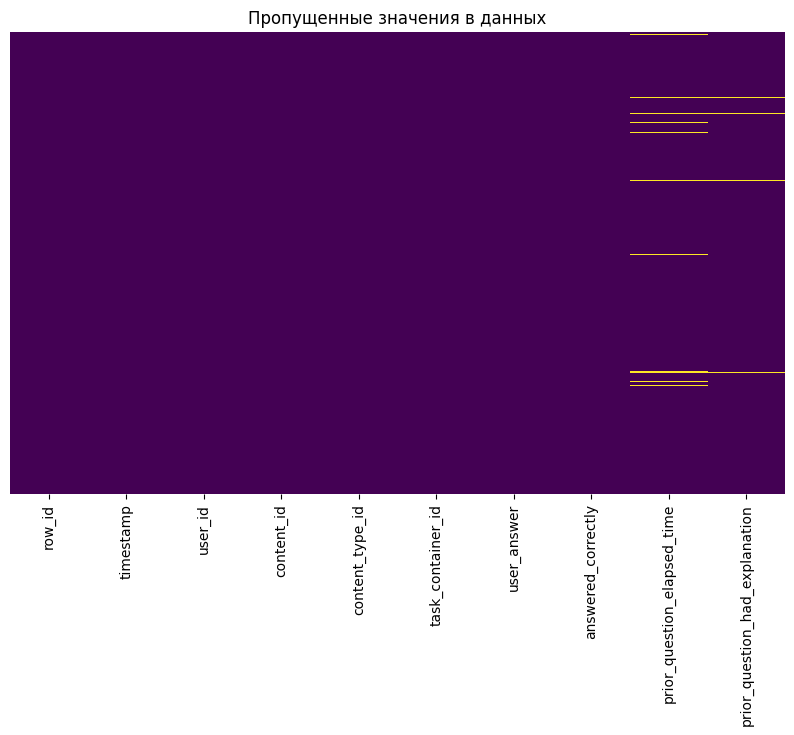

In [47]:
# Визуализация пропусков с помощью библиотеки seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

Из графика наглядно видно, что пропущенные значения есть только у 2 признаков (в 2 столбцах) и процентное соотношение их к общему объему крайне мало, следовательно избавляться от них не имеет смысла.

## Шаг 3: Распределение переменных

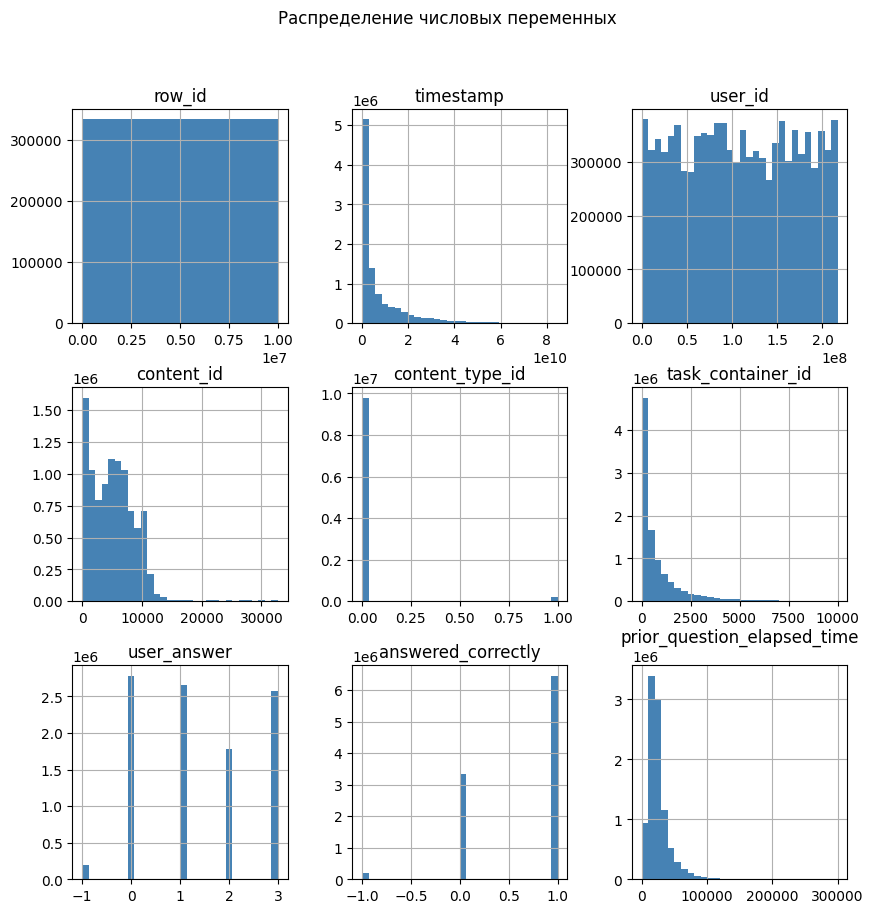

In [48]:
# Распределение числовых переменных
train.hist(bins=30, figsize=(10, 10), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()

## Шаг 4: Анализ выбросов и аномалий

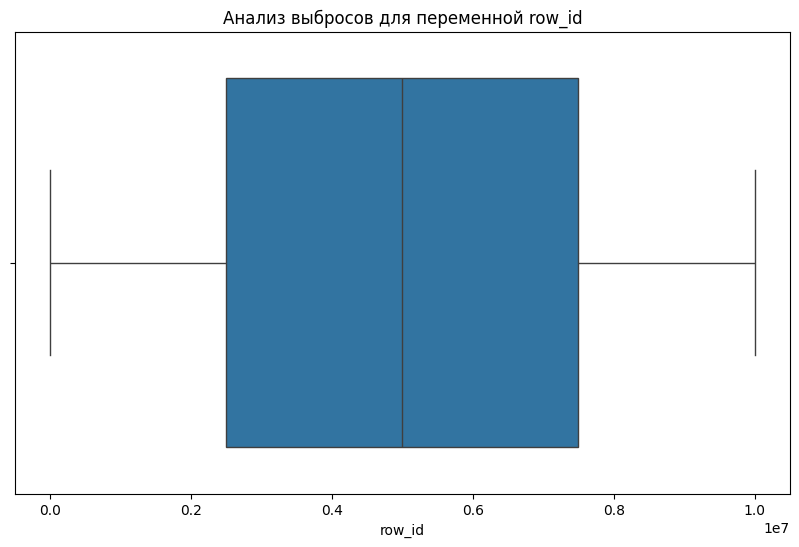

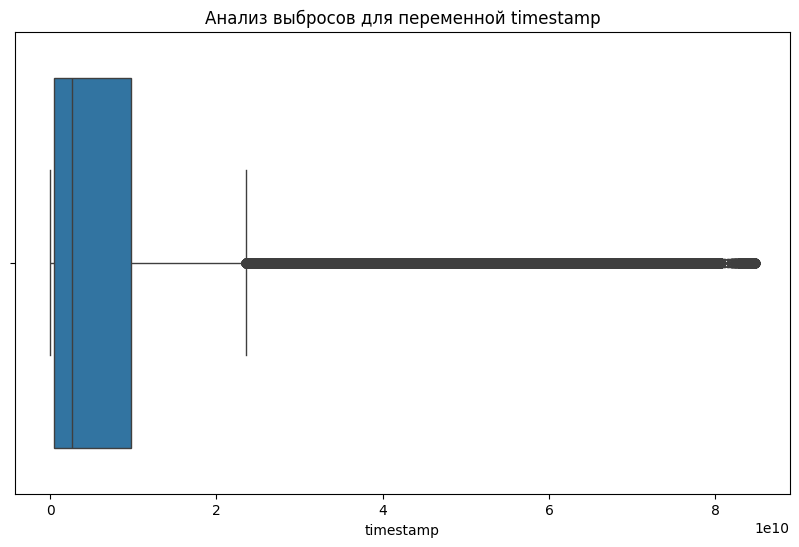

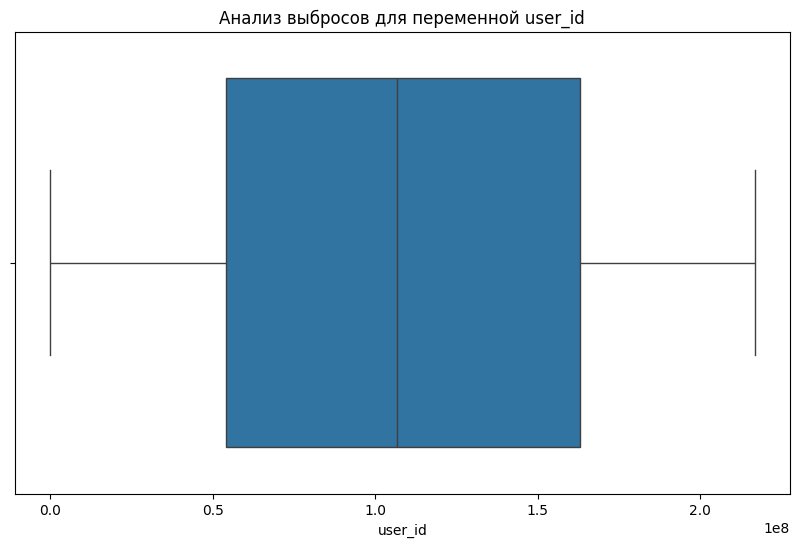

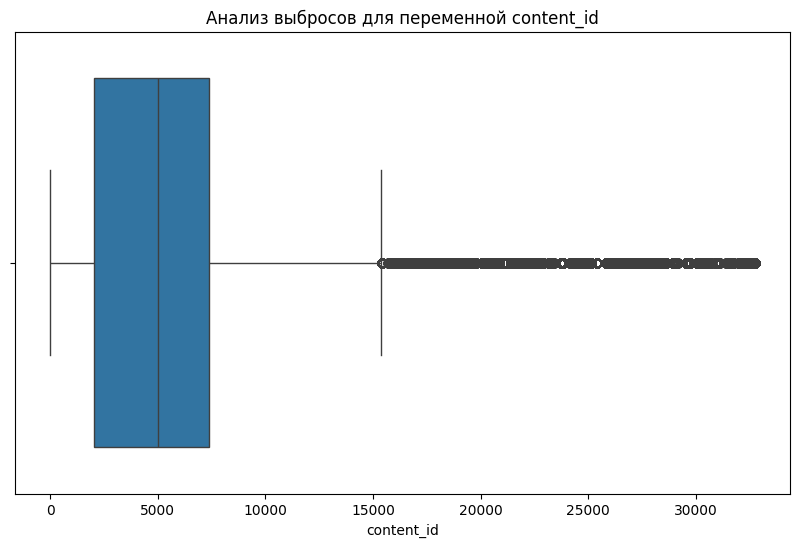

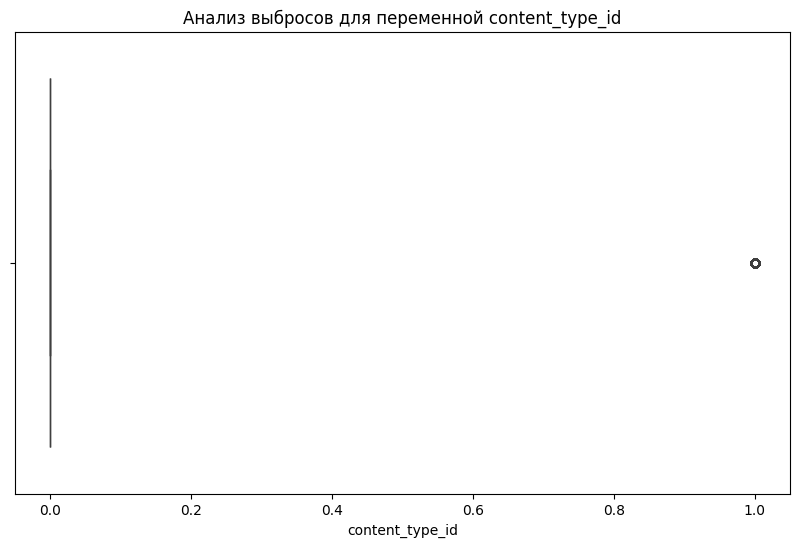

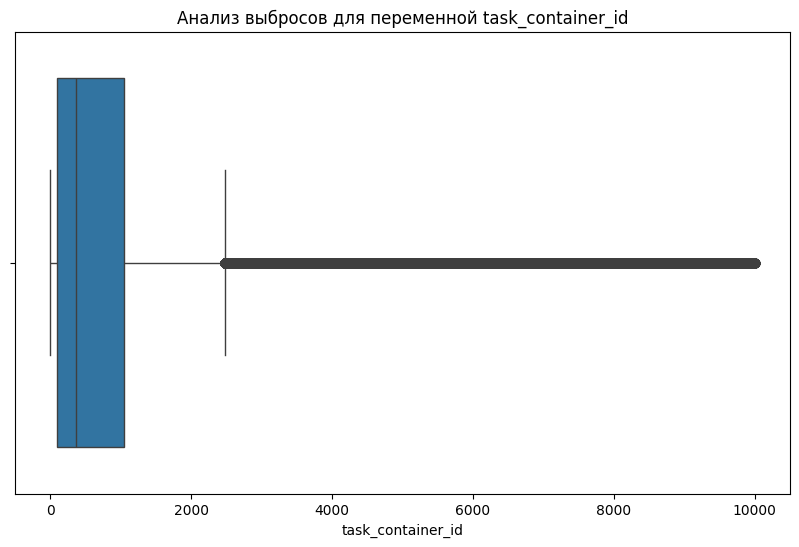

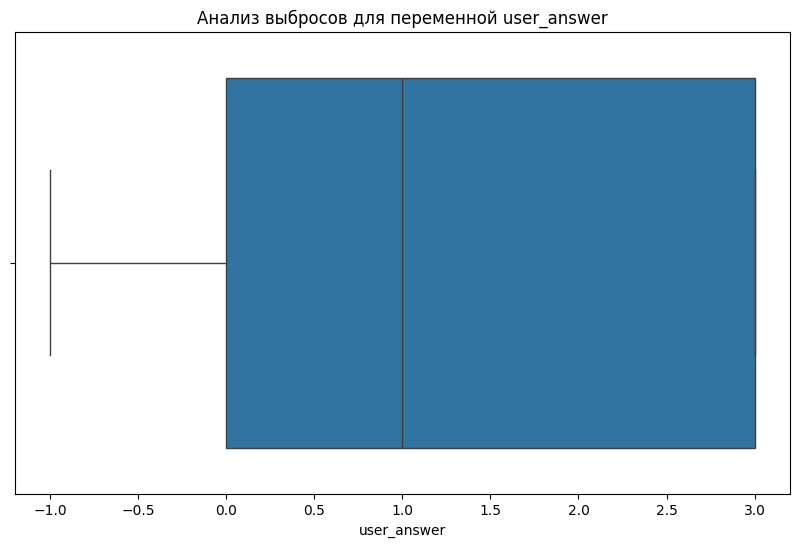

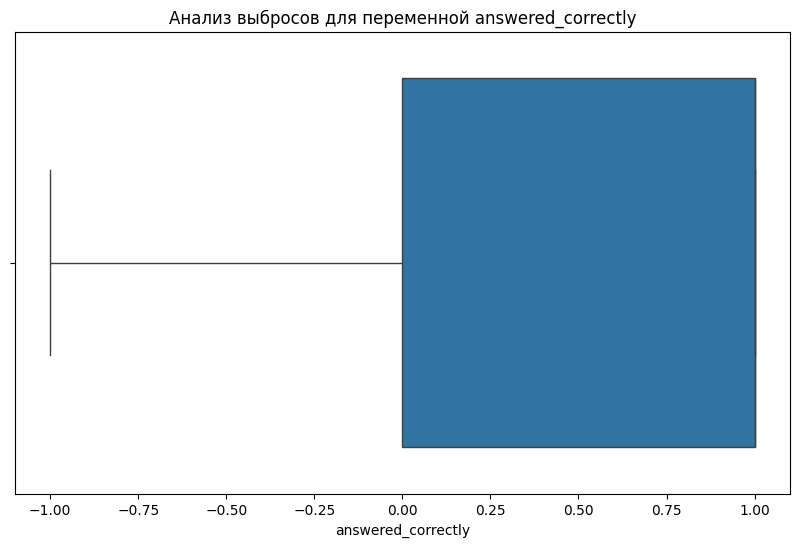

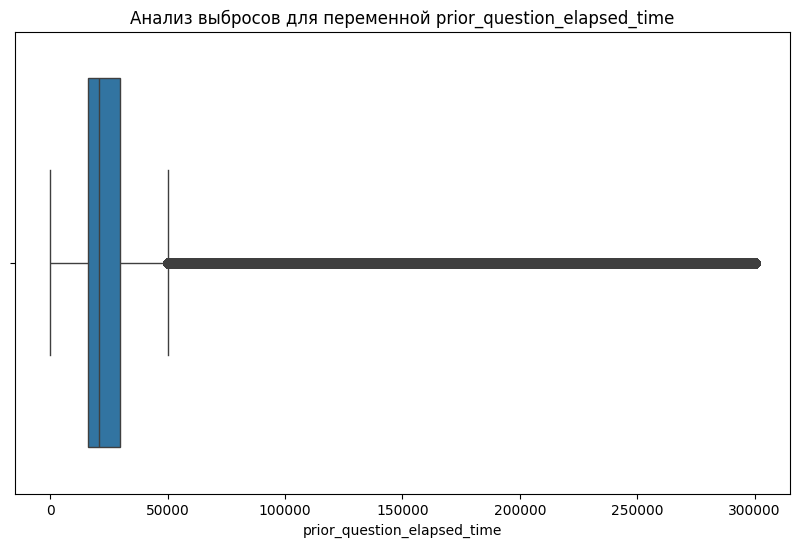

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_outliers(df):
    # Отбираем только числовые столбцы
    numeric_columns = df.select_dtypes(include=['float32', 'int64', 'int32', 'int16', 'int8']).columns
    
    # Построение boxplot для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column], orient='h')
        plt.title(f'Анализ выбросов для переменной {column}')
        plt.show()

# Анализ выбросов для всех числовых переменных
analyze_outliers(train)


## Шаг 5: Взаимосвязь между признакам

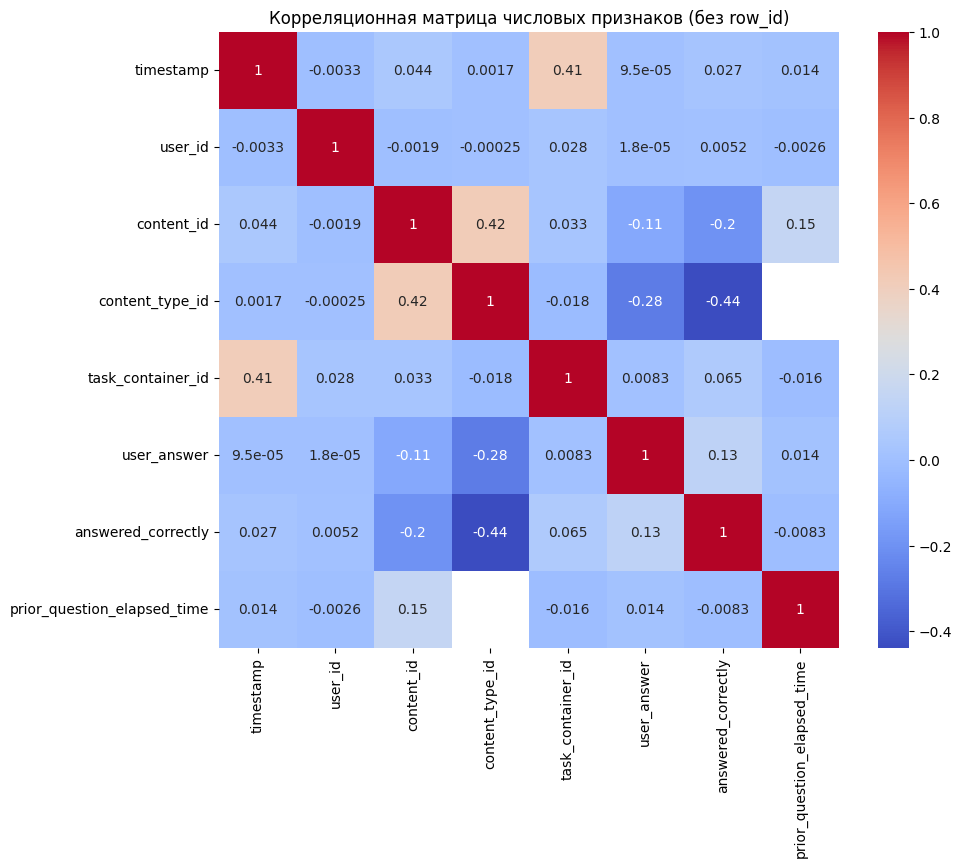

In [50]:
# Выбор только числовых признаков и удаление столбца row_id
numeric_cols = train.select_dtypes(include=['float32', 'int64', 'int32', 'int16', 'int8']).drop(columns=['row_id'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков (без row_id)')
plt.show()